In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('no_missing_housing_data.csv')

In [19]:
df

,daysOnMarket,availableFrom,street,price,borough,zip,propertyType,beds,baths,latitude,...,Hispanic or Latino_ratio,Population Below Poverty Level_ratio,Employed_ratio,Unemployed_ratio,High School Graduate (Age 25+)_ratio,Bachelor’s Degree (Age 25+)_ratio,Graduate or Professional Degree (Age 25+)_ratio,Never Married_ratio,Currently Married_ratio,Divorced_ratio
0,1.0,2024-11-25,171 East 96th Street #4A,1855.0,Brooklyn,11212,rental,1,1.0,40.662186,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
1,4.0,2024-11-22,93 East 96th Street #11,2235.0,Brooklyn,11212,rental,2,1.0,40.663817,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
2,4.0,2024-11-22,501 Saratoga Avenue #B,1750.0,Brooklyn,11212,rental,1,1.0,40.668506,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
3,6.0,2024-11-20,1115 Willmohr Street #2P,1850.0,Brooklyn,11212,rental,1,1.0,40.657349,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
4,7.0,2024-11-19,1075 Clarkson Avenue #2B,3000.0,Brooklyn,11212,rental,3,1.0,40.659825,...,0.194808,0.324774,0.369616,0.061293,0.200164,0.079363,0.002393,0.188141,0.100302,0.026939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,121.0,2024-11-15,1027 Faile St APT 3,4070.0,Bronx,10459,apartment,4,1.0,40.823948,...,0.673351,0.303268,0.398834,0.064545,0.133881,0.064083,0.000866,0.207451,0.126357,0.028654
6967,6.0,2024-11-15,80 Tyrrell St #1,3800.0,Staten Island,10307,apartment,3,3.0,40.513058,...,0.105524,0.046425,0.468655,0.004066,0.140969,0.136089,0.003321,0.148153,0.242765,0.031040
6968,5.0,2024-11-15,11 Maiden Ln APT 6B,3750.0,Manhattan,10038,apartment,2,1.0,40.709580,...,0.111040,0.195433,0.538791,0.028702,0.060532,0.279527,0.011095,0.239472,0.145440,0.017179
6969,10.0,2024-11-15,88 Fulton St #TOWNHOUSE 1,3200.0,Manhattan,10038,apartment,1,1.0,40.709370,...,0.111040,0.195433,0.538791,0.028702,0.060532,0.279527,0.011095,0.239472,0.145440,0.017179


In [20]:
# Get the list of non-numerical (categorical) variables
non_numerical_variables = df.select_dtypes(exclude=['number']).columns.tolist()

# Print the non-numerical variables
print("Non-Numerical Variables:")
print(non_numerical_variables)


Non-Numerical Variables:
['availableFrom', 'street', 'borough', 'propertyType']


In [21]:
df.dtypes

daysOnMarket                                       float64
availableFrom                                       object
street                                              object
price                                              float64
borough                                             object
zip                                                  int64
propertyType                                        object
beds                                                 int64
baths                                              float64
latitude                                           float64
longitude                                          float64
hasVideo                                             int64
PhotosNum                                            int64
Number of Households                               float64
Median Household Income                            float64
Per Capita Income                                  float64
Total Income Distribution                          float

In [22]:
df['street'].value_counts()

street
171 East 96th Street #4A         1
252 Richmond Ter #2A             1
320 E 85th St APT 4A             1
125 E 83rd St APT 4              1
238 E 82nd St APT 1A             1
                                ..
24 Central Park South #12W       1
160 Central Park South #1810     1
120 Central Park South #12DEF    1
1 Central Park South #1710       1
111 Fulton St PENTHOUSE 202      1
Name: count, Length: 6971, dtype: int64

In [23]:
df['street'].head(50)

0         171 East 96th Street #4A
1          93 East 96th Street #11
2           501 Saratoga Avenue #B
3         1115 Willmohr Street #2P
4         1075 Clarkson Avenue #2B
5          945 Saratoga Avenue #3B
6           819 Saratoga Avenue #1
7         435 East 92nd Street #E3
8          509 Saratoga Avenue #C1
9             363 Amboy Street #1F
10        114 Mulberry Street #702
11         117 Mulberry Street #13
12             167 Mott Street #AB
13             124 Mott Street #3L
14            212 Grand Street #2B
15             123 Mott Street #12
16              158 Mott Street #9
17            150 Baxter Street #3
18           240 Centre Street #3K
19          165 Mulberry Street #8
20          4 Centre Market Place 
21         163 Mulberry Street #20
22          80 Elizabeth Street #6
23          120 Mulberry Street #2
24              373 92nd Street #3
25             9303 Shore Road #1H
26             443 95th Street #A9
27               67 93rd Street #4
28             146 9

In [24]:
housing_data = df

In [25]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encode 'borough' and 'propertyType'
df_encoded = pd.get_dummies(housing_data, columns=['borough', 'propertyType'], drop_first=True, dtype=int)

# # Label encode 'street' (if you think it's relevant)
# label_encoder = LabelEncoder()
# df_encoded['street_encoded'] = label_encoder.fit_transform(housing_data['street'])
# df_encoded = df_encoded.drop(columns=['street'])  # Drop original 'street' column

In [26]:
housing_data = df_encoded
housing_data

,daysOnMarket,availableFrom,street,price,zip,beds,baths,latitude,longitude,hasVideo,...,Divorced_ratio,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island,propertyType_condo,propertyType_coop,propertyType_house,propertyType_rental,propertyType_townhouse
0,1.0,2024-11-25,171 East 96th Street #4A,1855.0,11212,1,1.0,40.662186,-73.922293,1,...,0.026939,1,0,0,0,0,0,0,1,0
1,4.0,2024-11-22,93 East 96th Street #11,2235.0,11212,2,1.0,40.663817,-73.924122,1,...,0.026939,1,0,0,0,0,0,0,1,0
2,4.0,2024-11-22,501 Saratoga Avenue #B,1750.0,11212,1,1.0,40.668506,-73.917055,1,...,0.026939,1,0,0,0,0,0,0,1,0
3,6.0,2024-11-20,1115 Willmohr Street #2P,1850.0,11212,1,1.0,40.657349,-73.917750,1,...,0.026939,1,0,0,0,0,0,0,1,0
4,7.0,2024-11-19,1075 Clarkson Avenue #2B,3000.0,11212,3,1.0,40.659825,-73.922602,1,...,0.026939,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,121.0,2024-11-15,1027 Faile St APT 3,4070.0,10459,4,1.0,40.823948,-73.889854,0,...,0.028654,0,0,0,0,0,0,0,0,0
6967,6.0,2024-11-15,80 Tyrrell St #1,3800.0,10307,3,3.0,40.513058,-74.249470,0,...,0.031040,0,0,0,1,0,0,0,0,0
6968,5.0,2024-11-15,11 Maiden Ln APT 6B,3750.0,10038,2,1.0,40.709580,-74.009330,0,...,0.017179,0,1,0,0,0,0,0,0,0
6969,10.0,2024-11-15,88 Fulton St #TOWNHOUSE 1,3200.0,10038,1,1.0,40.709370,-74.006035,0,...,0.017179,0,1,0,0,0,0,0,0,0


In [27]:
housing_data['street_number'] = housing_data['street'].str.extract(r'^(\d+)').astype(float)

In [28]:
# housing_data['street_name'] = housing_data['street'].str.extract(r'^\d+\s+(.*?)(?:\s+#|$)')
# housing_data['street_direction'] = housing_data['street'].str.extract(r'^(East|West|North|South)')
# housing_data['unit'] = housing_data['street'].str.extract(r'#(.*)$')


In [29]:
housing_data

,daysOnMarket,availableFrom,street,price,zip,beds,baths,latitude,longitude,hasVideo,...,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island,propertyType_condo,propertyType_coop,propertyType_house,propertyType_rental,propertyType_townhouse,street_number
0,1.0,2024-11-25,171 East 96th Street #4A,1855.0,11212,1,1.0,40.662186,-73.922293,1,...,1,0,0,0,0,0,0,1,0,171.0
1,4.0,2024-11-22,93 East 96th Street #11,2235.0,11212,2,1.0,40.663817,-73.924122,1,...,1,0,0,0,0,0,0,1,0,93.0
2,4.0,2024-11-22,501 Saratoga Avenue #B,1750.0,11212,1,1.0,40.668506,-73.917055,1,...,1,0,0,0,0,0,0,1,0,501.0
3,6.0,2024-11-20,1115 Willmohr Street #2P,1850.0,11212,1,1.0,40.657349,-73.917750,1,...,1,0,0,0,0,0,0,1,0,1115.0
4,7.0,2024-11-19,1075 Clarkson Avenue #2B,3000.0,11212,3,1.0,40.659825,-73.922602,1,...,1,0,0,0,0,0,0,1,0,1075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,121.0,2024-11-15,1027 Faile St APT 3,4070.0,10459,4,1.0,40.823948,-73.889854,0,...,0,0,0,0,0,0,0,0,0,1027.0
6967,6.0,2024-11-15,80 Tyrrell St #1,3800.0,10307,3,3.0,40.513058,-74.249470,0,...,0,0,0,1,0,0,0,0,0,80.0
6968,5.0,2024-11-15,11 Maiden Ln APT 6B,3750.0,10038,2,1.0,40.709580,-74.009330,0,...,0,1,0,0,0,0,0,0,0,11.0
6969,10.0,2024-11-15,88 Fulton St #TOWNHOUSE 1,3200.0,10038,1,1.0,40.709370,-74.006035,0,...,0,1,0,0,0,0,0,0,0,88.0


In [30]:
housing_data['street_number'].isna().sum()

0

In [31]:
housing_data['street_number'].value_counts()

street_number
100.0     42
15.0      41
40.0      36
150.0     31
111.0     30
          ..
1527.0     1
1351.0     1
1495.0     1
1541.0     1
937.0      1
Name: count, Length: 2026, dtype: int64

In [34]:
 housing_data.isna().sum()

daysOnMarket                                       0
availableFrom                                      0
street                                             0
price                                              0
zip                                                0
beds                                               0
baths                                              0
latitude                                           0
longitude                                          0
hasVideo                                           0
PhotosNum                                          0
Number of Households                               0
Median Household Income                            0
Per Capita Income                                  0
Total Income Distribution                          0
Median Gross Rent                                  0
Median Home Value                                  0
Occupied Housing Units                             0
Vacant Housing Units                          

In [43]:
housing_data.columns

Index(['daysOnMarket', 'availableFrom', 'price', 'zip', 'beds', 'baths',
       'latitude', 'longitude', 'hasVideo', 'PhotosNum',
       'Number of Households', 'Median Household Income', 'Per Capita Income',
       'Total Income Distribution', 'Median Gross Rent', 'Median Home Value',
       'Occupied Housing Units', 'Vacant Housing Units',
       'Owner-Occupied Units (value < $100,000)', 'Monthly Housing Costs',
       'Precinct', 'schools_in_precinct', 'nearby_subway_stations',
       'crime_rate', 'precinct_safety_rank', 'Median Age_ratio',
       'Male Population_ratio', 'Female Population_ratio', 'White Alone_ratio',
       'Black or African American Alone_ratio', 'Asian Alone_ratio',
       'Hispanic or Latino_ratio', 'Population Below Poverty Level_ratio',
       'Employed_ratio', 'Unemployed_ratio',
       'High School Graduate (Age 25+)_ratio',
       'Bachelor’s Degree (Age 25+)_ratio',
       'Graduate or Professional Degree (Age 25+)_ratio',
       'Never Married_ratio', 

In [36]:
housing_data = housing_data.drop('street', axis=1)

In [37]:
housing_data

,daysOnMarket,availableFrom,price,zip,beds,baths,latitude,longitude,hasVideo,PhotosNum,...,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island,propertyType_condo,propertyType_coop,propertyType_house,propertyType_rental,propertyType_townhouse,street_number
0,1.0,2024-11-25,1855.0,11212,1,1.0,40.662186,-73.922293,1,4,...,1,0,0,0,0,0,0,1,0,171.0
1,4.0,2024-11-22,2235.0,11212,2,1.0,40.663817,-73.924122,1,5,...,1,0,0,0,0,0,0,1,0,93.0
2,4.0,2024-11-22,1750.0,11212,1,1.0,40.668506,-73.917055,1,7,...,1,0,0,0,0,0,0,1,0,501.0
3,6.0,2024-11-20,1850.0,11212,1,1.0,40.657349,-73.917750,1,4,...,1,0,0,0,0,0,0,1,0,1115.0
4,7.0,2024-11-19,3000.0,11212,3,1.0,40.659825,-73.922602,1,9,...,1,0,0,0,0,0,0,1,0,1075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,121.0,2024-11-15,4070.0,10459,4,1.0,40.823948,-73.889854,0,0,...,0,0,0,0,0,0,0,0,0,1027.0
6967,6.0,2024-11-15,3800.0,10307,3,3.0,40.513058,-74.249470,0,18,...,0,0,0,1,0,0,0,0,0,80.0
6968,5.0,2024-11-15,3750.0,10038,2,1.0,40.709580,-74.009330,0,5,...,0,1,0,0,0,0,0,0,0,11.0
6969,10.0,2024-11-15,3200.0,10038,1,1.0,40.709370,-74.006035,0,0,...,0,1,0,0,0,0,0,0,0,88.0


In [39]:
# Check if all columns are numerical (int or float)
numerical_columns = housing_data.select_dtypes(include=['number']).columns.tolist()

# Check if the number of numerical columns matches the total number of columns
if len(numerical_columns) == len(housing_data.columns):
    print("All columns are numerical, no encoding left to do.")
else:
    print("There are still non-numerical columns in the DataFrame.")
    print("Non-numerical columns:", set(housing_data.columns) - set(numerical_columns))


There are still non-numerical columns in the DataFrame.
Non-numerical columns: {'availableFrom'}


In [44]:
housing_data2 = housing_data.drop('availableFrom', axis=1)

In [45]:
# Save the DataFrame to a CSV file
housing_data2.to_csv('before_fe3.csv', index=False)

# Lets engineer new features

In [41]:
# Convert 'availableFrom' to datetime if it's not already
housing_data['availableFrom'] = pd.to_datetime(housing_data['availableFrom'], errors='coerce')

# Extract year, month, and day
housing_data['year_available'] = housing_data['availableFrom'].dt.year
housing_data['month_available'] = housing_data['availableFrom'].dt.month
housing_data['day_available'] = housing_data['availableFrom'].dt.day

# Check the result
print(housing_data[['availableFrom', 'year_available', 'month_available', 'day_available']].head())

  availableFrom  year_available  month_available  day_available
0    2024-11-25            2024               11             25
1    2024-11-22            2024               11             22
2    2024-11-22            2024               11             22
3    2024-11-20            2024               11             20
4    2024-11-19            2024               11             19


In [46]:
housing_data['beds_baths_interaction'] = housing_data['beds'] * housing_data['baths']
housing_data['log_monthly_housing_costs'] = np.log1p(housing_data['Monthly Housing Costs'])


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
housing_data['precinct_safety_rank_scaled'] = scaler.fit_transform(housing_data[['precinct_safety_rank']])
housing_data['median_income_scaled'] = scaler.fit_transform(housing_data[['Median Household Income']])

In [48]:
housing_data['crime_to_safety_ratio'] = housing_data['crime_rate'] / (housing_data['precinct_safety_rank'] + 1)  # Avoid division by zero
housing_data['beds_to_baths_ratio'] = housing_data['beds'] / (housing_data['baths'] + 1)  # Avoid division by zero


In [49]:
housing_data['diversity_index'] = (
    housing_data['White Alone_ratio'] * 
    housing_data['Black or African American Alone_ratio'] *
    housing_data['Asian Alone_ratio'] *
    housing_data['Hispanic or Latino_ratio']
)

In [50]:
housing_data['occupied_to_vacant_ratio'] = (
    housing_data['Occupied Housing Units'] / (housing_data['Vacant Housing Units'] + 1)  # Avoid division by zero
)

In [51]:
# Save the DataFrame to a CSV file
housing_data.to_csv('after_fe.csv', index=False)

In [52]:
housing_data

,daysOnMarket,availableFrom,price,zip,beds,baths,latitude,longitude,hasVideo,PhotosNum,...,month_available,day_available,beds_baths_interaction,log_monthly_housing_costs,precinct_safety_rank_scaled,median_income_scaled,crime_to_safety_ratio,beds_to_baths_ratio,diversity_index,occupied_to_vacant_ratio
0,1.0,2024-11-25,1855.0,11212,1,1.0,40.662186,-73.922293,1,4,...,11,25,1.0,7.087574,1.393251,-1.454809,0.029137,0.500000,0.000074,13.157442
1,4.0,2024-11-22,2235.0,11212,2,1.0,40.663817,-73.924122,1,5,...,11,22,2.0,7.087574,1.393251,-1.454809,0.029137,1.000000,0.000074,13.157442
2,4.0,2024-11-22,1750.0,11212,1,1.0,40.668506,-73.917055,1,7,...,11,22,1.0,7.087574,1.539399,-1.454809,0.029947,0.500000,0.000074,13.157442
3,6.0,2024-11-20,1850.0,11212,1,1.0,40.657349,-73.917750,1,4,...,11,20,1.0,7.087574,1.393251,-1.454809,0.029137,0.500000,0.000074,13.157442
4,7.0,2024-11-19,3000.0,11212,3,1.0,40.659825,-73.922602,1,9,...,11,19,3.0,7.087574,1.393251,-1.454809,0.029137,1.500000,0.000074,13.157442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6966,121.0,2024-11-15,4070.0,10459,4,1.0,40.823948,-73.889854,0,0,...,11,15,4.0,7.188413,0.272790,-1.325090,0.032050,2.000000,0.000073,25.148305
6967,6.0,2024-11-15,3800.0,10307,3,3.0,40.513058,-74.249470,0,18,...,11,15,9.0,7.658228,-1.627123,0.668903,0.205292,0.750000,0.000001,20.458824
6968,5.0,2024-11-15,3750.0,10038,2,1.0,40.709580,-74.009330,0,5,...,11,15,2.0,7.921536,0.029211,0.069353,0.034026,1.000000,0.001610,5.254689
6969,10.0,2024-11-15,3200.0,10038,1,1.0,40.709370,-74.006035,0,0,...,11,15,1.0,7.921536,0.029211,0.069353,0.034026,0.500000,0.001610,5.254689


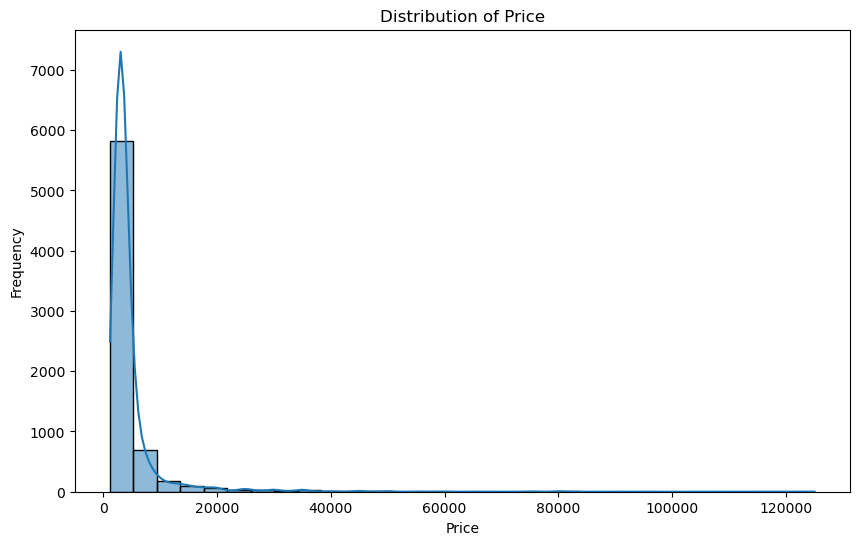

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the price column
plt.figure(figsize=(10, 6))
sns.histplot(housing_data['price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
